# More image processing with ```OpenCV```

In [1]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

We're going to start by seeing more ways that we can manipulate images using ```OpenCV```.

In [2]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))
width = image.shape[1]
height = image.shape[0]

__Rotation__

To rotate about a point, we first need to define that point and then use the function ```cv2.getRotationMatrix2D```.

This function takes the following arguments:

```cv2.getRotationMatrix2D((x_point, y_point), degrees, scale)```

In [6]:
M = cv2.getRotationMatrix2D((width/2, height/2), 7, 1) # defining the rotation (3 defines rotation, 1 defines scale)
# M is now a 2x3 matrix:
M

array([[  0.99254615,   0.12186934, -12.58868169],
       [ -0.12186934,   0.99254615,  22.17687381]])

In [7]:
rotated = cv2.warpAffine(image, M, (width, height)) # implementing the rotation to the image

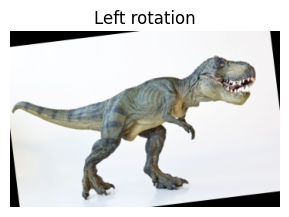

In [8]:
jimshow(rotated, "Left rotation") # applying and showing the rotated image

__Translation__

In [9]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))
width = image.shape[1]
height = image.shape[0]

To *translate* an image, there is no specific built-in function with ```OpenCV``` to define a translation matrix. 

Instead, we need to define then translation matrix we want to use.

We can do that using ```numpy```.

$Matrix (M) = [\frac{size}{rotation}\frac{rotation}{size}\frac{location}{location}]$

In [10]:
M = np.float64([[1, 0, 25], # 99 defines the vertical position. 1 defines the vertical width
                [0, 1, 25]]) # 50 defines the horizontal position. 1 defines the horizontal width

We can then use the ```cv2.warpAffine()``` function to translate our image.

There's some tricky maths involved here - for the mathematically inclined, you can read more [here](https://people.computing.clemson.edu/~dhouse/courses/401/notes/affines-matrices.pdf)

But the crucial point is that we're essentially multiplying together the original image by the translation matrix ```M``` that we've just defined, which results in a modified image being created.

In [11]:
shifted = cv2.warpAffine(image, M, (width, height))

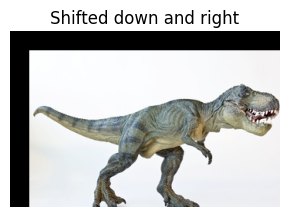

In [12]:
jimshow(shifted, "Shifted down and right")

## Drawing

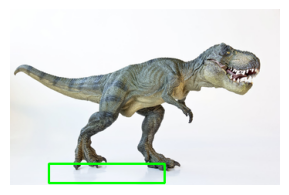

In [13]:
# cv2.rectangle(image, start_point, end_point, RGB colors, thickness)
cv2.rectangle(image, (50, 200), (200, 225), (0,255,0), 2) 
jimshow(image)

__Draw circle__

In [14]:
(centerX, centerY) = (image.shape[1] // 2, image.shape[0] // 2)

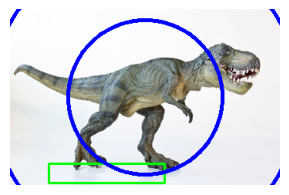

In [16]:
# cv2.circl(image, cent_coords, radius, colour, thickness)
cv2.circle(image, (centerX, centerY), 100, (255,0,0), 4)
jimshow(image)

**NOTE:** Drawing on images is *destructive*! It modifies the image in place and can't easily be removed. 

If you draw on an image and then decide you want the original image without the drawings on it, you'll need to load the image again.

In [ ]:
# load our dino pal
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

## Using masks

We can see how bitwise operations work by just starting out with a simple rectangle and circle of white pixels on black backgrounds.

In [ ]:
# Create a 300x300 array of zeros
zeros = np.zeros((300, 300), dtype = "uint8")

**Question:** What does the following cell do? Can you explain it natural language?

In [ ]:
# cv2.rectangle(image, start_point, end_point, RGB colors, thickness)
rect = cv2.rectangle(zeros, (25, 25), (275, 275), 255, -1) # why minus 1?
# It draws a square inside the 300x300 array of zeros. The square starts at x = 25 and y = 25, and ends at x = 275, y = 275. Color is white

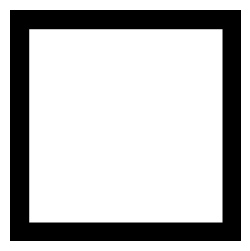

In [ ]:
jimshow_channel(rect)

__Circle__

We can get a circular mask in much the same way, this time using ```cv2.circle()```.


In [ ]:
# circle
zeros = np.zeros((300, 300), dtype = "uint8")

**Question:** Again, can you explain what this is doing? 

In [ ]:
circ = cv2.circle(zeros, (150, 150), 150, 255, -1)
# Draws a circle from the point 150,150 (middle of image) with a radius of 150 in white color

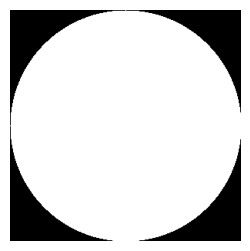

In [ ]:
jimshow_channel(circ)

__Rectangle mask__

In [ ]:
# Mask should be same shape as image
mask = np.zeros(image.shape[:2], dtype="uint8")

**Question:** What is this cell doing?

In [ ]:
mask = cv2.rectangle(mask, (100,100), (200, 200), 255, -1)
# drawing a rectangle in the bottom left of the image, starting in xy 100, 100, ending at xy 200, 200, in white (255)

**Question:** What do you expect to see here?

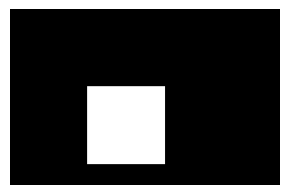

In [ ]:
jimshow_channel(mask)

**Question:** And what do you expect to see here?

**And:** "A bitwise AND is true if and only if both pixels are greater than zero."

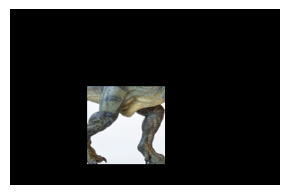

In [ ]:
jimshow(cv2.bitwise_and(image, image, mask=mask))
# since it's the and operater it means that if both pixels from each image is above 0, it should be one. So I expect to see a white square on top of the dino

__Circular mask__

**Question:** What do you think this does and what do you expect to see after running the next two cells?

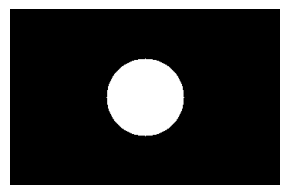

In [ ]:
# create mask 'image'
mask = np.zeros(image.shape[:2], dtype = "uint8")
(centre_x, centre_y) = (image.shape[1]//2, image.shape[0]//2)
jimshow_channel(cv2.circle(mask, (centre_x, centre_y), 50, 255, -1))

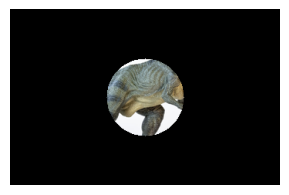

In [ ]:
jimshow(cv2.bitwise_and(image, image, mask=mask))

__Load image__

In [ ]:
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

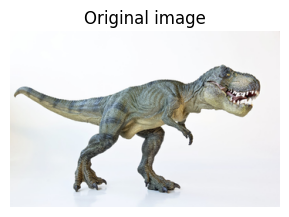

In [ ]:
jimshow(image, "Original image")

## Exercise

We've now seen how to load images and split them into their separate colour channels. We've also seen how we can use this to extract colour histograms showing distributions of pixel intensities across each channel. Lastly we've seen how we can use this to plot colour histograms for any given image.

- In your groups, rework the code in the cell above into a function which can create a colour histogram for any given image.

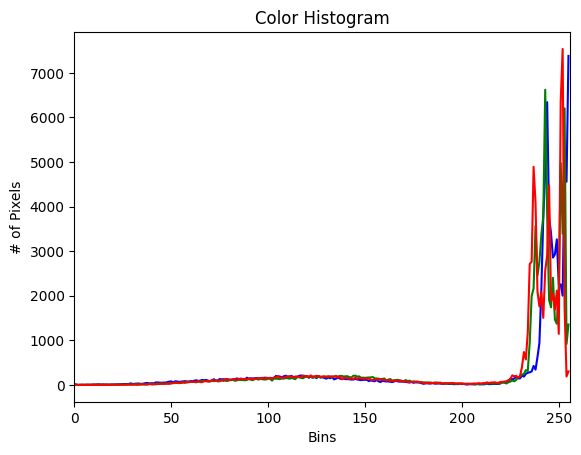

In [ ]:
def makecolorhistogramofanyimage (image): 
    # create a list of the channels in the image
    channels = cv2.split(image)
    colors = ("b", "g", "r")
    # create plot
    plt.figure()
    # add title
    plt.title("Color Histogram")
    # add x label
    plt.xlabel("Bins")
    # add y label
    plt.ylabel("# of Pixels")
    
    # loop over the image channels
    for (channel, color) in zip(channels, colors):
        # create a histogram for the current channel and plot it
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256]) 

makecolorhistogramofanyimage(image)

## Comparing histograms

We also saw briefly last week in class that we are able to compare images based on their colour histograms. This is something that can be done mathematically in ```OpenCV```. 

Let's load a different image.

In [ ]:
image2 = cv2.imread(os.path.join("..", "data", "img", "t-rex2.png"))

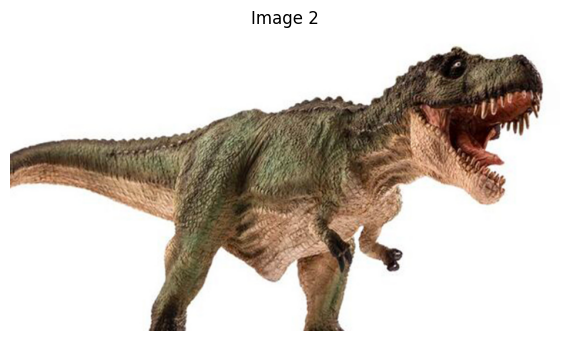

In [ ]:
jimshow(image2, "Image 2")

## Comparing histograms

__Extract histograms__

Last week we saw how to extract histograms from images using ```cv2.calcHist()```, specifically for single channels.

In the lines below, we're using ```cv2.calcHist()``` to extract histograms across all three channels.

In [ ]:
# 
hist1 = cv2.calcHist([image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256]) # 256 bins for each channel

In [ ]:
hist2 = cv2.calcHist([image2], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256]) 

__MinMax normalization__

Before comparing histograms, we first have to *normalise* them to occur within a narrower ranger of values. 

**Question:** Why do you think we need to do this?

We're doing to use MinMax normalisation, which we calculate in the following way for each value:

```norm_pixel = (value-min) / (max-min)```

That is to say for every pixel ```value``` we subtract the ```min``` pixel value in the image, then divide that by the ```max``` minus the ```min```. 

In [ ]:
hist1 = cv2.normalize(hist1, hist1, 0, 1.0, cv2.NORM_MINMAX)
hist2 = cv2.normalize(hist2, hist2, 0, 1.0, cv2.NORM_MINMAX)

__Comparing the first two histograms__

We're going to compare images computing the *Chi-Squared distance*, but there are a range of options available via OpenCV. 

You can read more [here](https://pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/).

In [ ]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2) # 0.0 means that the images are identical

33.77

__Load a new image__

In [ ]:
image3 = cv2.imread(os.path.join("..", "data", "img", "wave.png"))

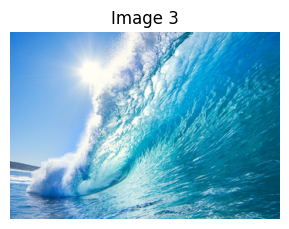

In [ ]:
jimshow(image3, "Image 3")

__Compare with image 1__

In [ ]:
hist3 = cv2.calcHist([image3], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
hist3 = cv2.normalize(hist3, hist3, 0, 1.0, cv2.NORM_MINMAX)

We can then show calculate the scores between image and the other images

In [ ]:
round(cv2.compareHist(hist1, hist1, cv2.HISTCMP_CHISQR), 2) 
# In this case, the images are identical, so the result should be 0.0

0.0

In [ ]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

33.77

In [ ]:
round(cv2.compareHist(hist1, hist3, cv2.HISTCMP_CHISQR), 2)
# 0.0 means that the images are identical 

100.04

## Exercise

In the shared drive ```cds-vis-data```, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

- Pick a random flower from the dataset, load it, and normalize it
- Compare that image's colour histogram to every *other* flower in the dataset
- Print save the filename of the 5 closest images, along with the distance score you calculated
  - **Hint:** use ```pandas```
- Qualitatively inspect the images - how does your algorithm perform?
- Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

This in-class exercise is going to be *Assignment 1* for Visual Analytics, designing a simple *image search* algorithm. The Github classroom repo for this Assignment will go online later.

In [2]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

Pick a random flower from the dataset, load it, and normalize it

In [5]:
# load image
flower_1 = cv2.imread(os.path.join("..", "data", "flowers", "image_0001.jpg"))

#### MIN/MAX normalize image ####

# First I'm extracing the histogram across all three channels of the image
flower_1_hist = cv2.calcHist([flower_1], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
# Then I'm normalizing the histogram
flower_1_min_max = cv2.normalize(flower_1_hist, flower_1_hist, 0, 1.0, cv2.NORM_MINMAX)

Compare that image's colour histogram to every *other* flower in the dataset

In [26]:
import os

folder_path = '/Users/wibe/Desktop/CogSci/Visual_analytics/cds-visual/data/flowers'
image_extensions = ['.jpg', '.png']

image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
               if os.path.isfile(os.path.join(folder_path, f))
               and os.path.splitext(f)[1].lower() in image_extensions]

In [33]:
def comparehistogram(image, image_list): # the input image_list should be a list of image paths
    # Loading the reference image
    image_ref = cv2.imread(image)
    # First I'm extracting the histogram across all three channels of the image
    image_hist_ref = cv2.calcHist([image_ref], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
    # Then I'm normalizing the histogram
    image_min_max_ref = cv2.normalize(image_hist_ref, image_hist_ref, 0, 1.0, cv2.NORM_MINMAX)
    # I'm creating an empty list for the results
    result = []
    # I'm looping over the list of images
    for i in image_list:
        # Load the current image
        image_cur = cv2.imread(i)
        if image_cur is not None: # if the image is not empty
            # I'm extracing the histogram across all three channels of the image
            image_hist = cv2.calcHist([image_cur], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
            # Then I'm normalizing the histogram
            image_min_max = cv2.normalize(image_hist, image_hist, 0, 1.0, cv2.NORM_MINMAX)
            # I'm appending the results to the empty list
            result.append(cv2.compareHist(image_min_max, image_min_max_ref, cv2.HISTCMP_CHISQR))
    return result

results = comparehistogram(image_paths[0], image_paths)

AttributeError: 'list' object has no attribute 'ascend'